# Player Detection

In [1]:
# Imports
%pip install opencv-python torch ultralytics numpy scikit-learn matplotlib

import cv2
import torch
import numpy as np
from sklearn.cluster import KMeans
from ultralytics import YOLO
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


# Uniform Color Filtering

**Use Uniform Color Filtering (Team Segmentation):**

- After detecting all humans using YOLOv8n, apply color-based segmentation on their jerseys.
- Use HVS color space to detect dominant jersey colors.
- Cluster similar colors using K-means to separate two teams.

## 1. Detect All Humans Using YOLO

In [2]:
# Constants
IMAGE_PATH = "../results/player-detection/test_image.png"

In [3]:
# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Load Image
image = cv2.imread(IMAGE_PATH)
height, width = image.shape[:2]  # Get image dimensions
results = model(image)

# Extract bounding boxes of detected persons
players = []
border_margin = 200

for result in results[0].boxes:  # Access the first image's detections
    print(result)
    x1, y1, x2, y2 = result.xyxy[0].tolist()
    conf = result.conf[0].item()
    class_id = result.cls[0].item()

    # Only add players that are not near the borders
    if (class_id == 0 and  # Class 0 in COCO is 'person'
        y1 > border_margin and
        y2 < height - border_margin):
        players.append((int(x1), int(y1), int(x2), int(y2)))




0: 512x640 9 persons, 79.9ms
Speed: 4.8ms preprocess, 79.9ms inference, 7.5ms postprocess per image at shape (1, 3, 512, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8013])
data: tensor([[388.6752, 511.7443, 487.3198, 677.7337,   0.8013,   0.0000]])
id: None
is_track: False
orig_shape: (1234, 1624)
shape: torch.Size([1, 6])
xywh: tensor([[437.9975, 594.7390,  98.6446, 165.9894]])
xywhn: tensor([[0.2697, 0.4820, 0.0607, 0.1345]])
xyxy: tensor([[388.6752, 511.7443, 487.3198, 677.7337]])
xyxyn: tensor([[0.2393, 0.4147, 0.3001, 0.5492]])
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.7729])
data: tensor([[9.4690e+02, 4.3321e+02, 1.0018e+03, 5.7168e+02, 7.7295e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1234, 1624)
shape: torch.Size([1, 6])
xywh: tensor([[974.3466, 502.4409,  54.8876, 138.4686]])
xywhn: tensor([[0.6000, 0.4072, 0.0338, 0.1122]])
xyxy: tensor([[ 946.9027,  433.2066,

## Visualize the Results

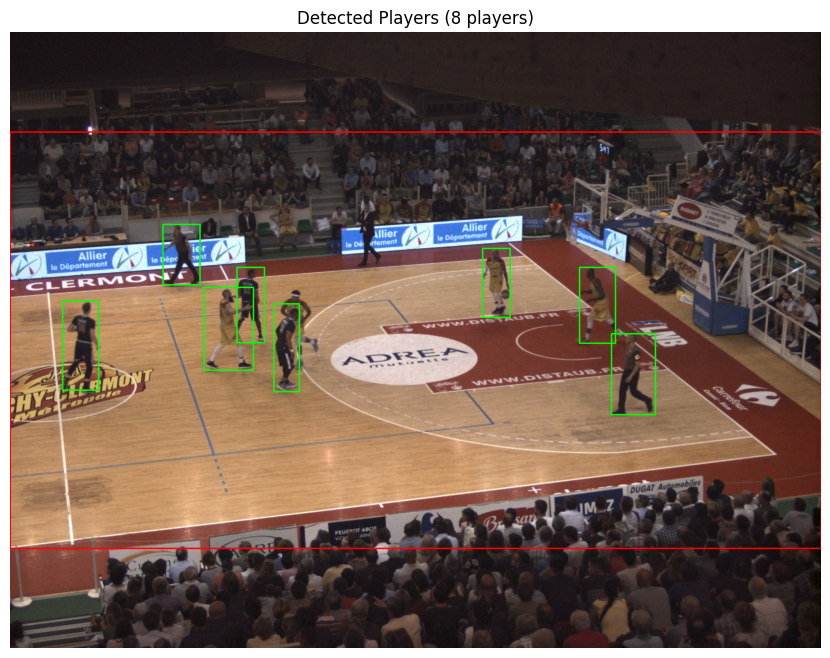

In [4]:
# Create a copy of the image for visualization
vis_image = image.copy()

# Draw border margin rectangle
cv2.rectangle(vis_image,
             (0, border_margin),
             (width, height - border_margin),
             (0, 0, 255),  # Red color
             2)  # Line thickness

# Draw bounding boxes for all detected players
for (x1, y1, x2, y2) in players:
    cv2.rectangle(vis_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# Convert BGR to RGB for matplotlib display
vis_image_rgb = cv2.cvtColor(vis_image, cv2.COLOR_BGR2RGB)


# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(vis_image_rgb)
plt.axis('off')
plt.title(f'Detected Players ({len(players)} players)')
plt.show()